In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sample_data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df.shape           # Número linhas e colunas
df.info()          # Tipagem dados
df.columns         # Ver nome das colunas
df.duplicated().sum()  # Verificar duplicatas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

np.int64(0)

In [ ]:
df.head()          # Primeiras linhas

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<Axes: title={'center': 'Distribuição de Attrition'}, xlabel='Attrition'>

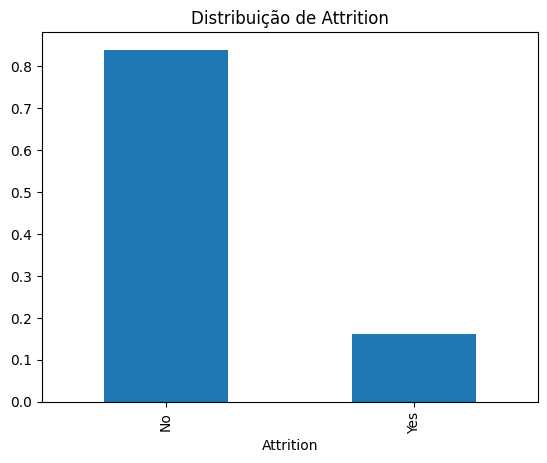

In [ ]:
#Verificando a distribuição da nossa variável principal
df['Attrition'].value_counts(normalize=True).plot(kind='bar', title='Distribuição de Attrition')

In [ ]:
# Verificando se variáveis são categóricas ou numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

print(f"Variáveis numéricas: {num_cols}")
print(f"Variáveis categóricas: {cat_cols}")


Variáveis numéricas: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Variáveis categóricas: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [ ]:
# Verificando principais métricas das variaveis numéricas
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


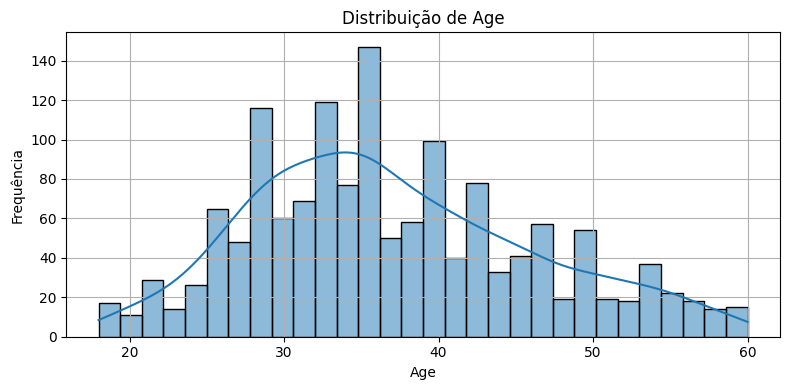

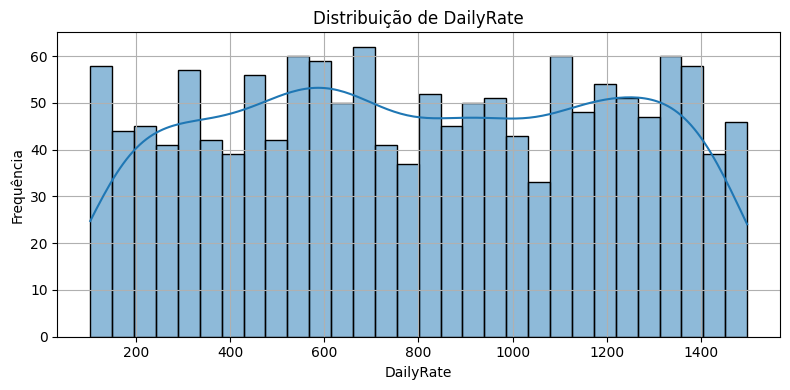

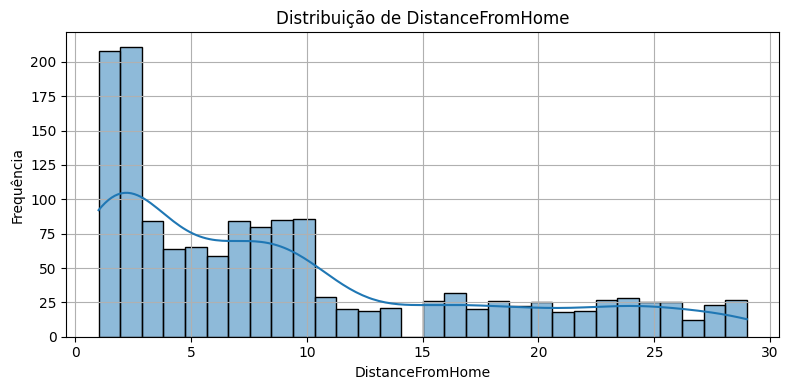

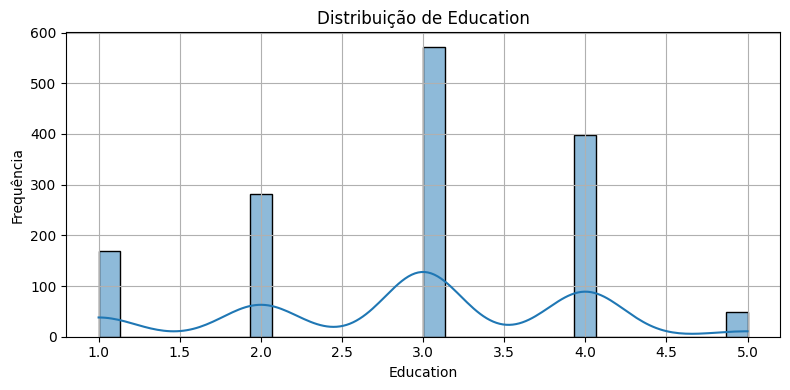

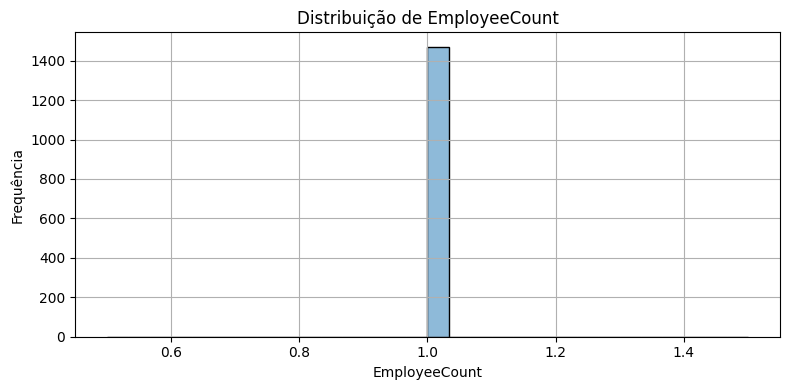

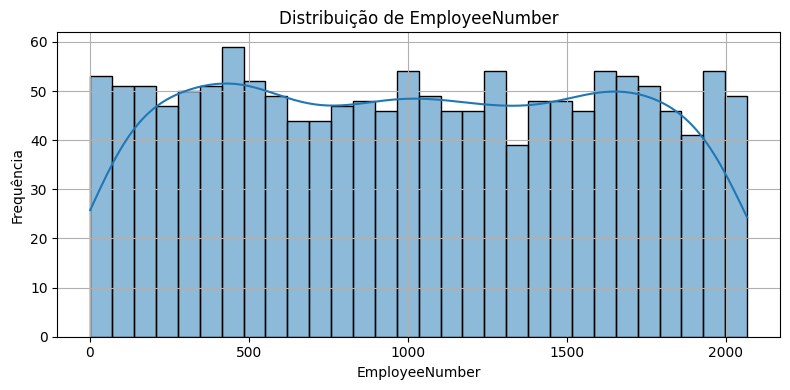

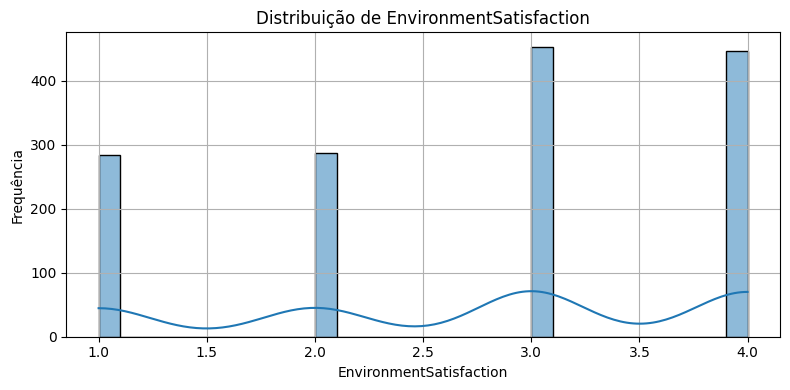

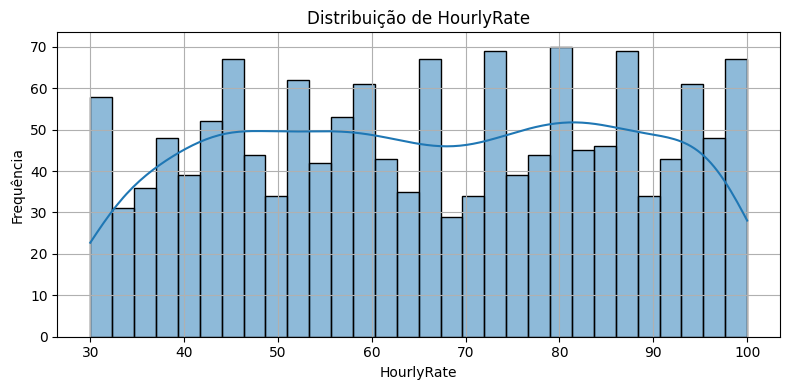

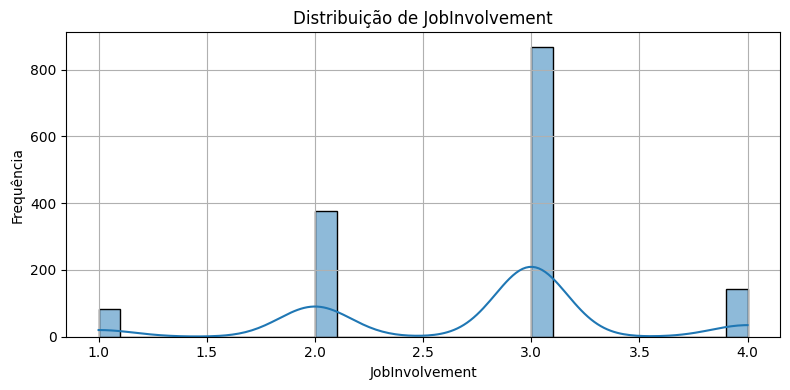

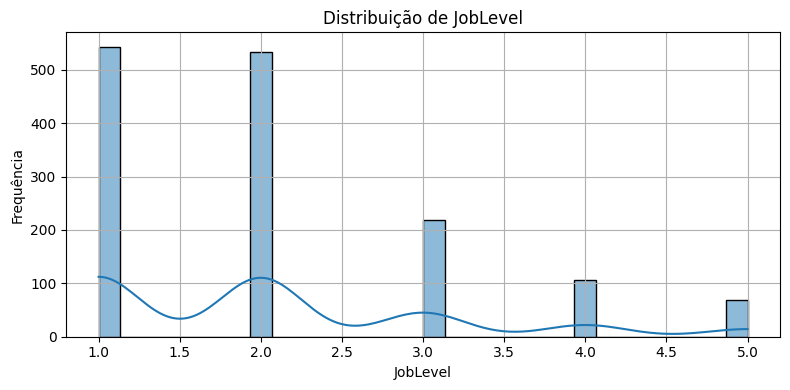

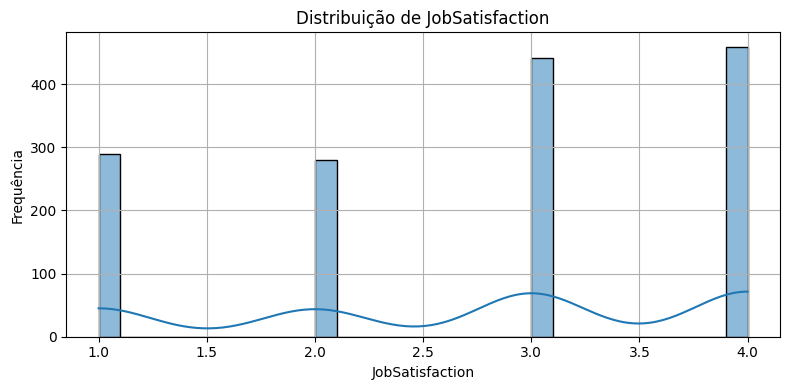

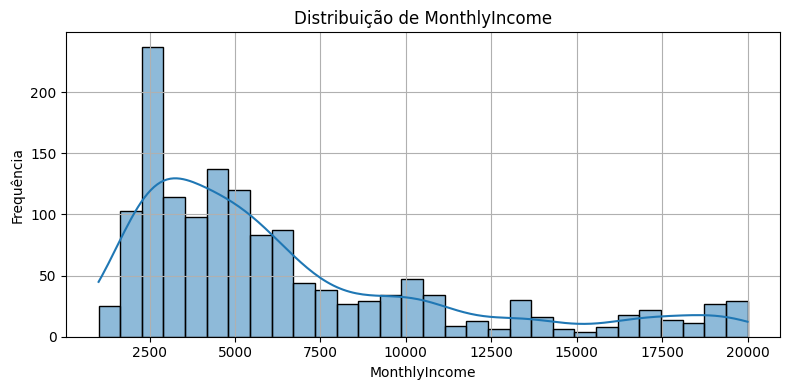

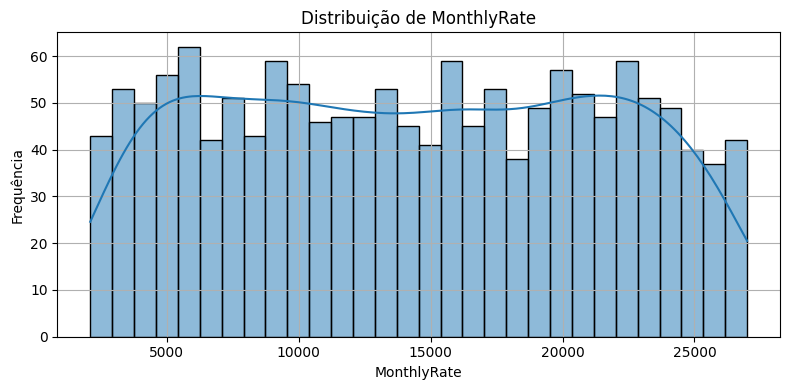

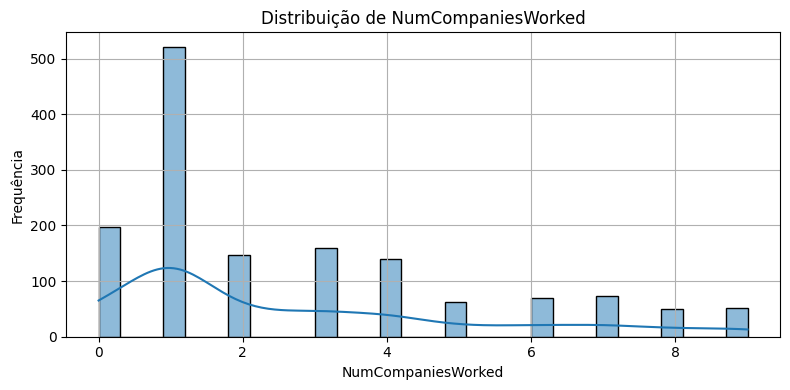

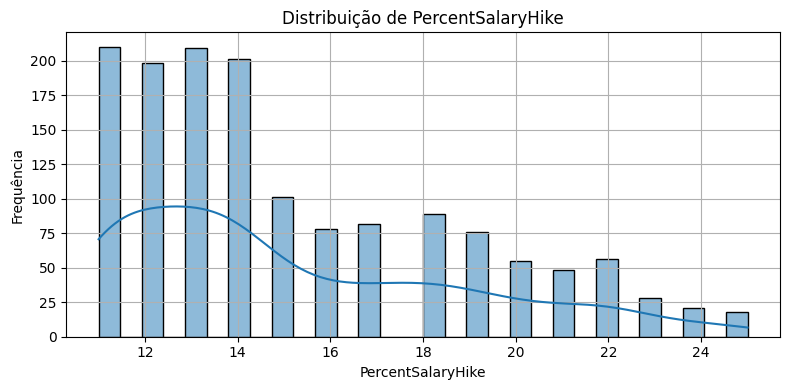

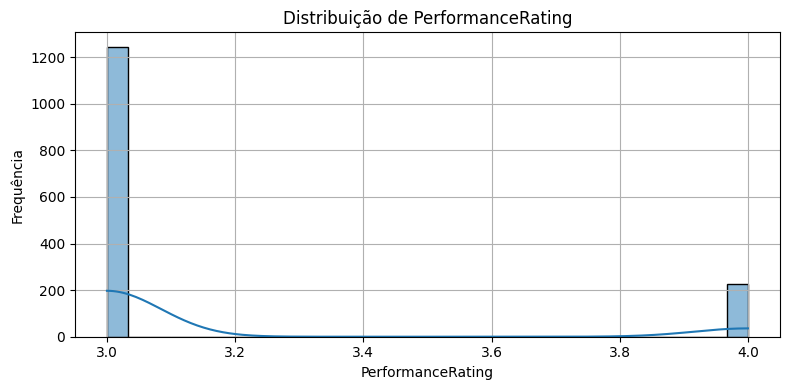

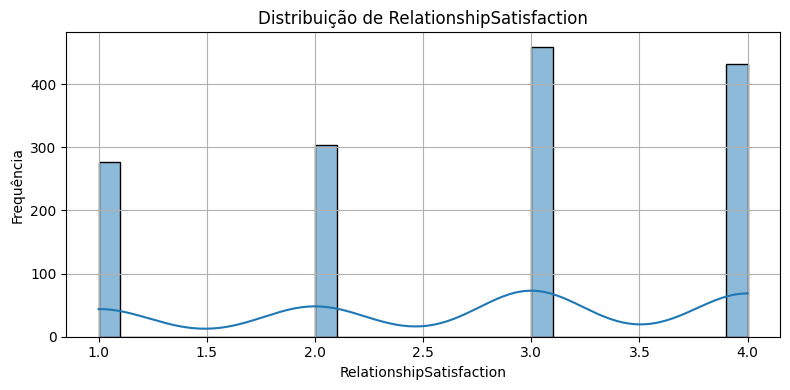

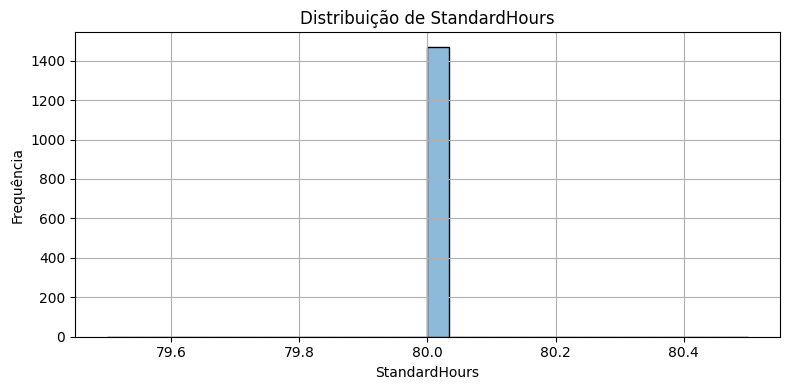

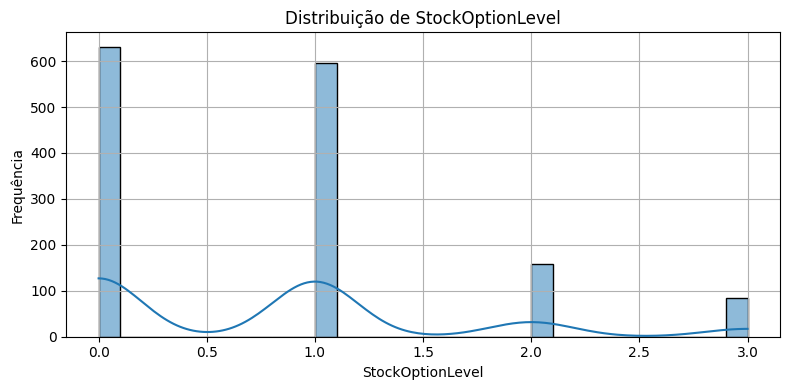

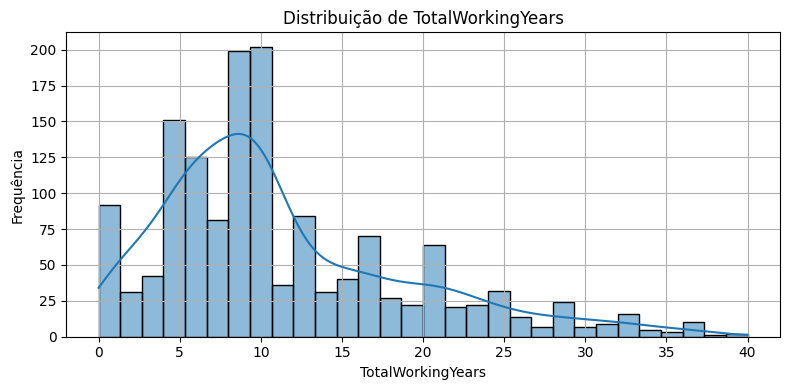

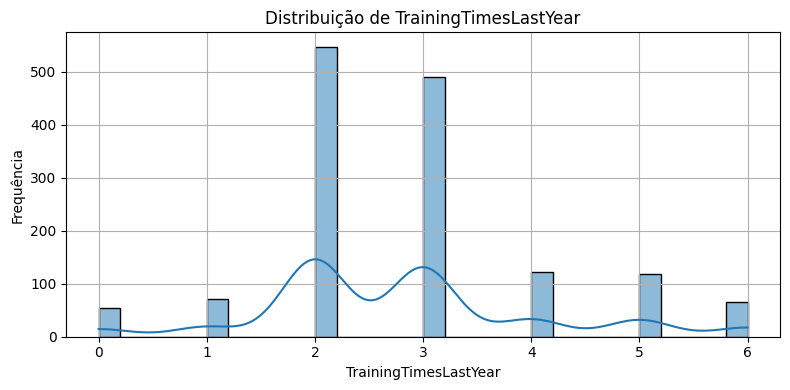

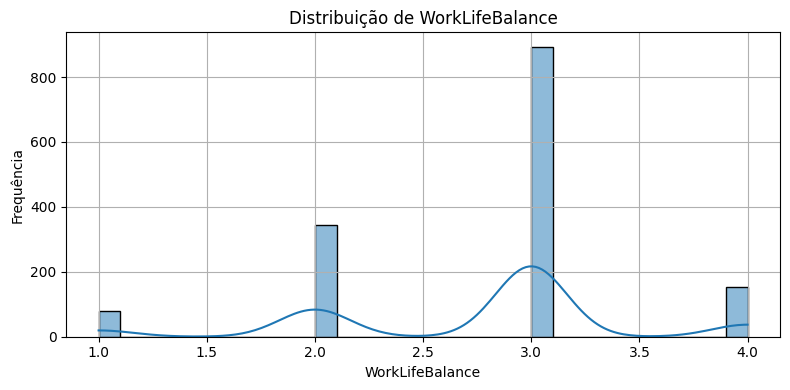

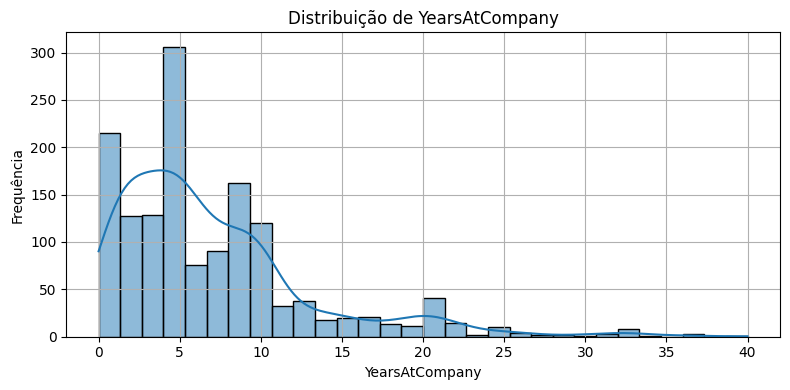

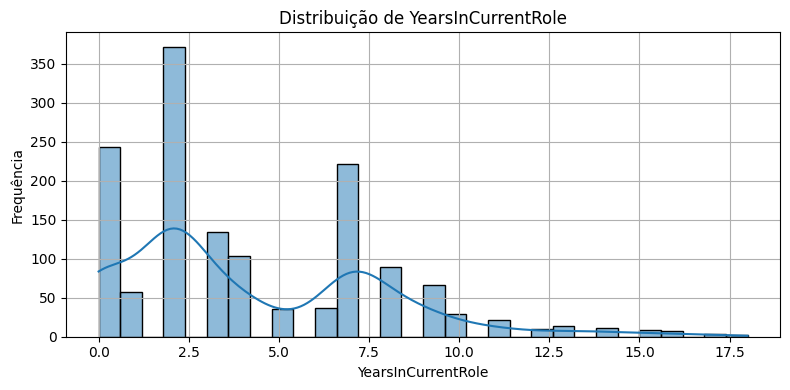

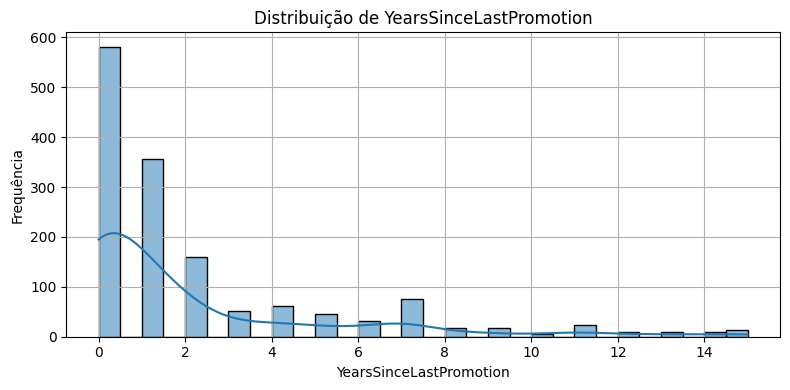

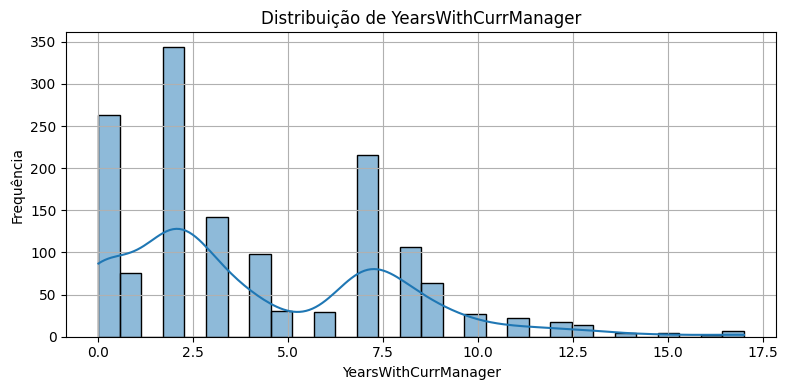

In [ ]:
# Verificando distribuições das Variáveis Numéricas
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


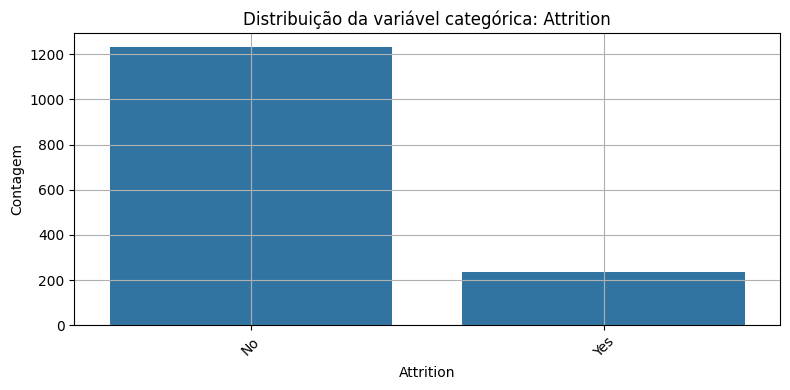

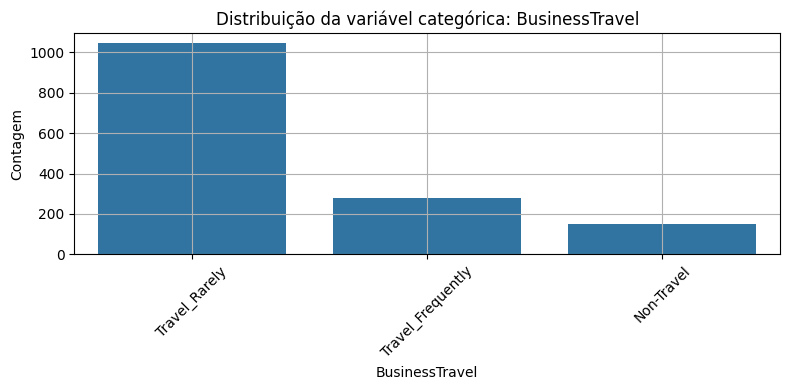

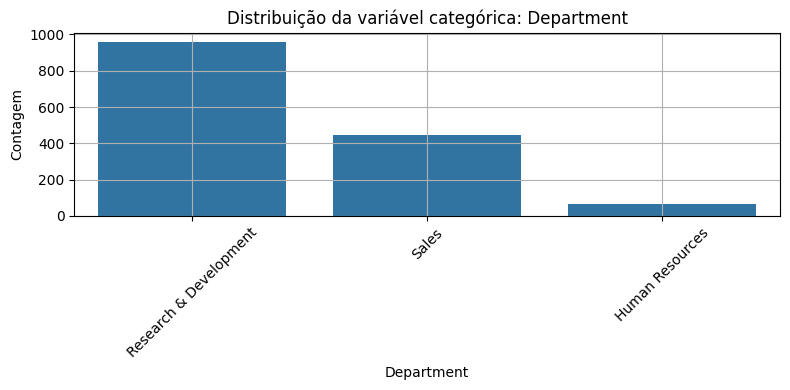

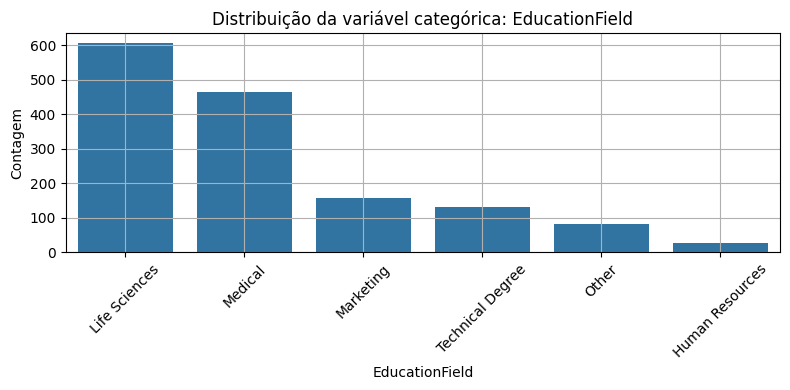

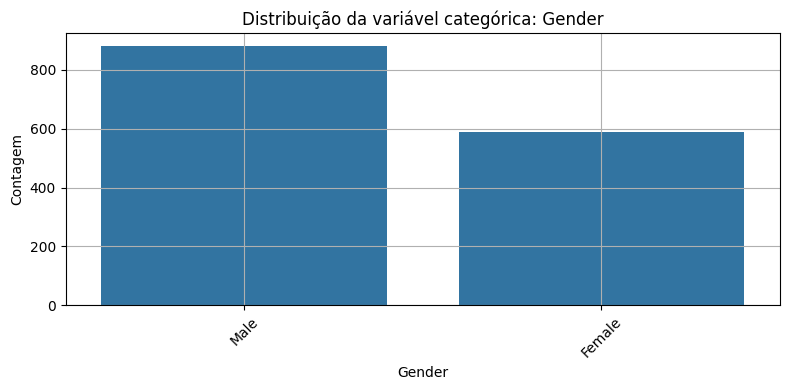

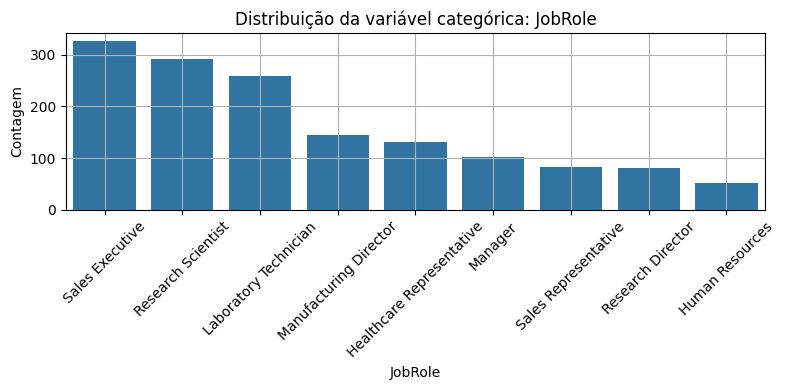

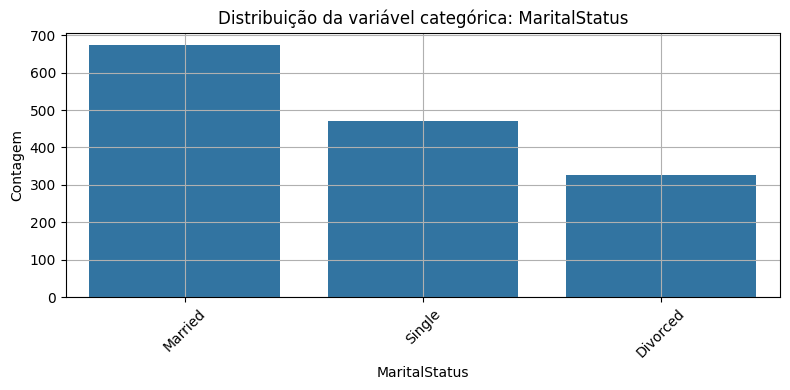

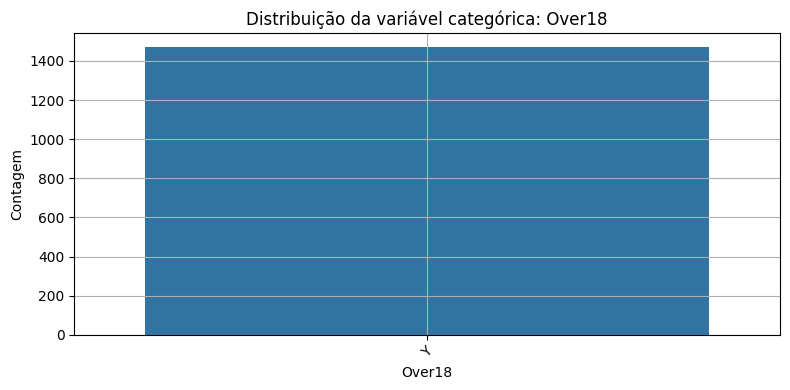

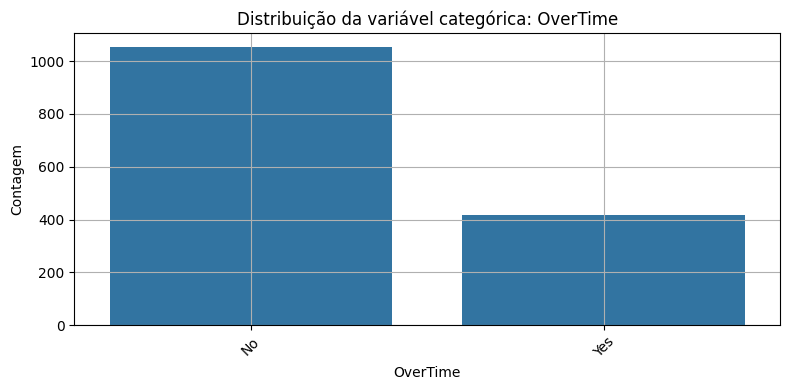

In [ ]:
# Verificando distribuições das Variáveis Categóricas
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribuição da variável categórica: {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

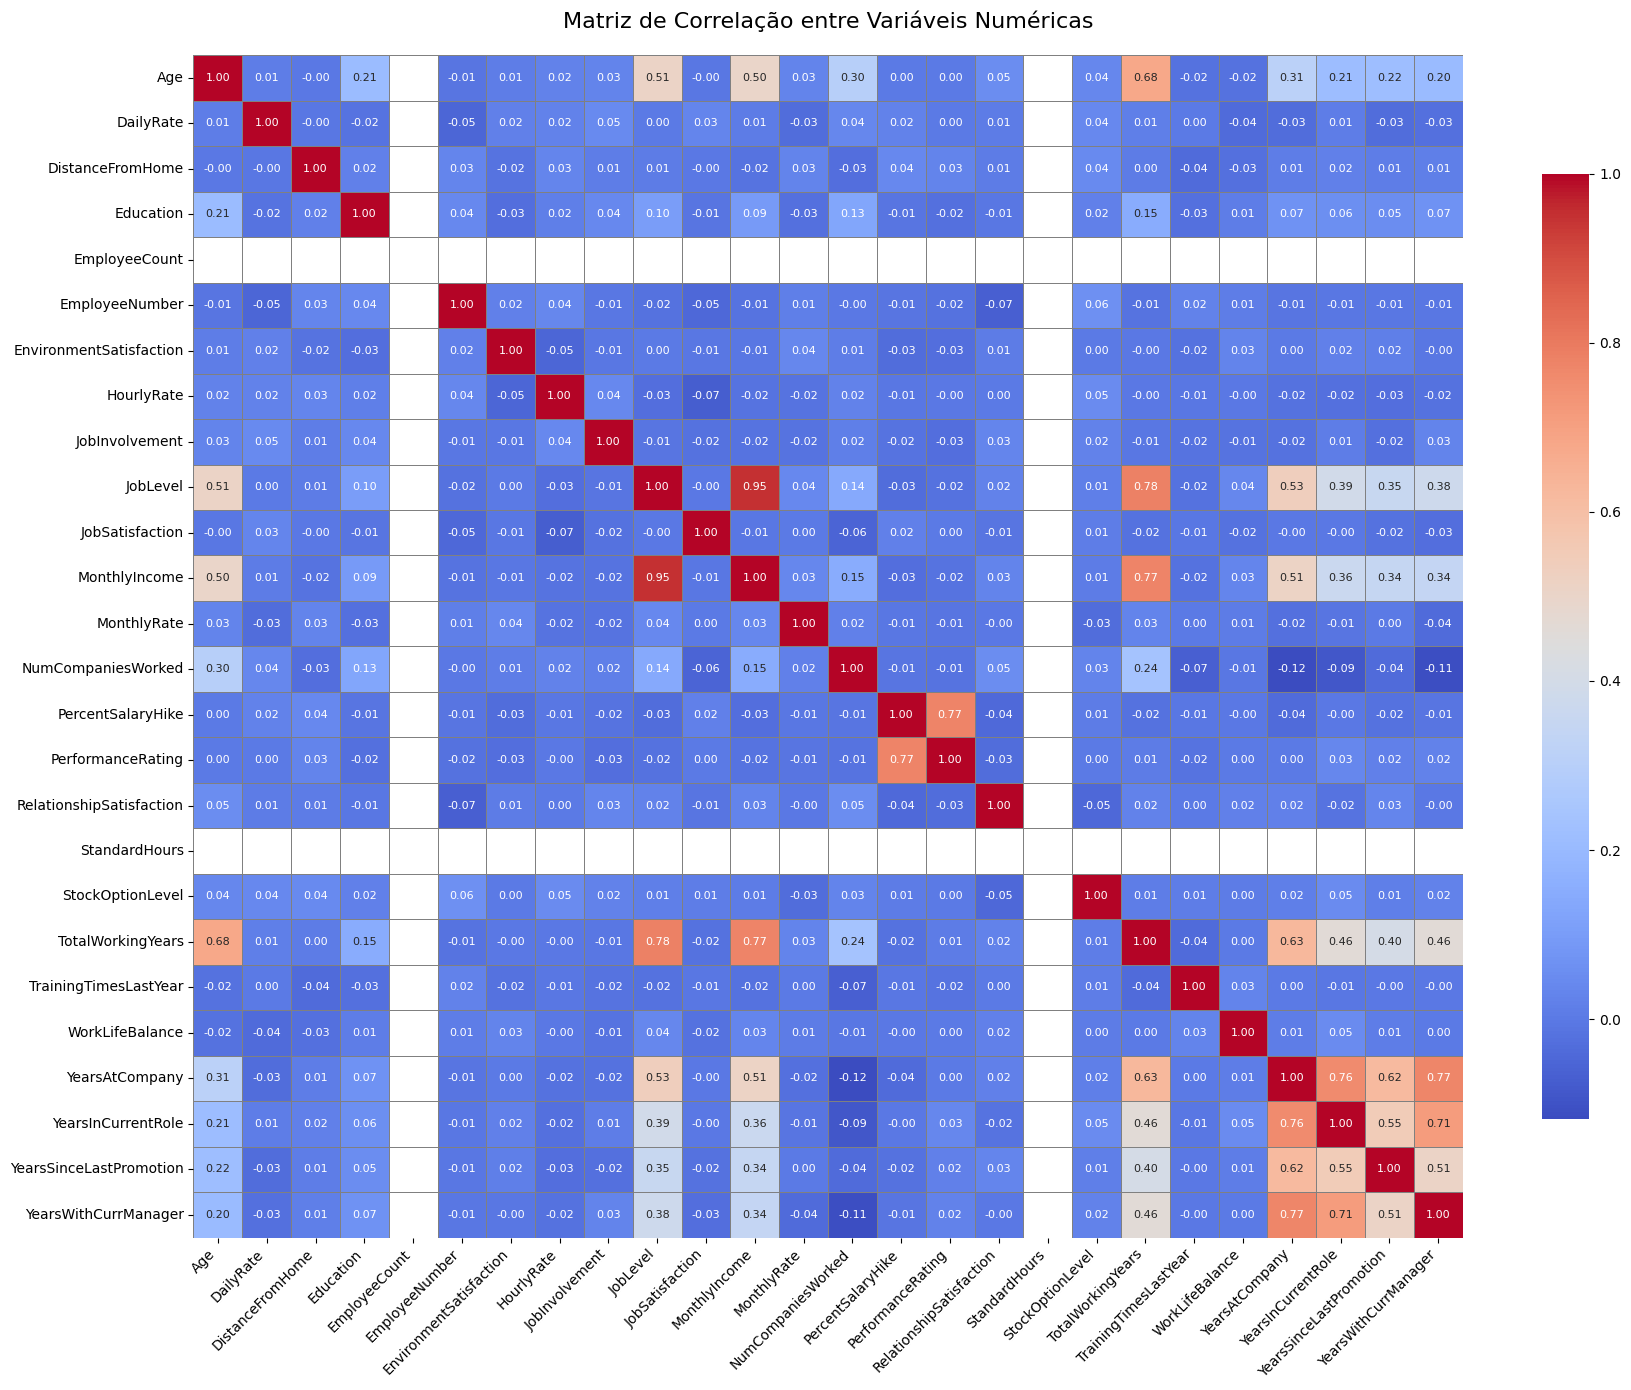

In [ ]:
# Gerando matriz de correlação
plt.figure(figsize=(18, 14))  # Aumenta tamanho da figura

corr_matrix = df[num_cols].corr()

sns.heatmap(
    corr_matrix,
    annot=True,             # Mostra os números
    fmt=".2f",              # Duas casas decimais
    cmap='coolwarm',        # Paleta intuitiva: azul-fraco a vermelho-forte
    annot_kws={"size": 8},  # Tamanho da fonte dos números
    square=False,           # Quadrados proporcionais à matriz
    linewidths=0.5,         # Linhas entre células
    linecolor='gray',
    cbar_kws={"shrink": 0.8}  # Barra lateral menor
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


/tmp/ipython-input-18-1507213168.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_attrition.values, y=corr_with_attrition.index, palette='coolwarm')


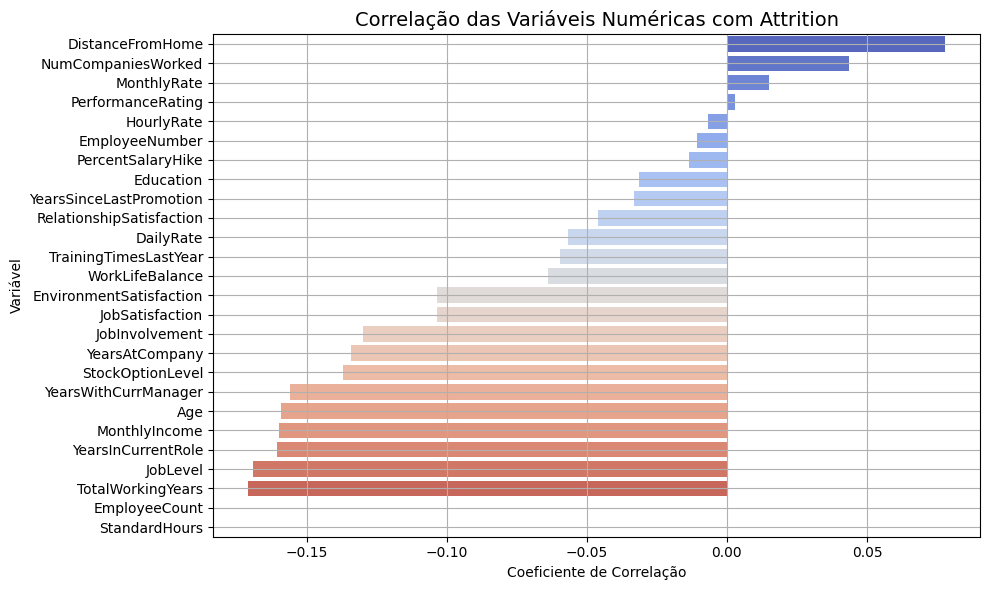

In [ ]:
# Converter Attrition para binário
df['Attrition_numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Correlação das variáveis numéricas + target convertido
corr_with_attrition = df[num_cols + ['Attrition_numeric']].corr()['Attrition_numeric'].sort_values(ascending=False)

# Remover o próprio Attrition_numeric da visualização (pois sempre = 1)
corr_with_attrition = corr_with_attrition.drop('Attrition_numeric')

# Gráfico de barras horizontais das correlações
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_attrition.values, y=corr_with_attrition.index, palette='coolwarm')

plt.title('Correlação das Variáveis Numéricas com Attrition', fontsize=14)
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Variável')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# Top 5 correlações positivas com Attrition
top_positivas = corr_with_attrition.sort_values(ascending=False).head(5)
print("Top 5 variáveis com correlação POSITIVA com Attrition:\n")
print(top_positivas)

# Top 5 correlações negativas com Attrition
top_negativas = corr_with_attrition.sort_values().head(5)
print("\nTop 5 variáveis com correlação NEGATIVA com Attrition:\n")
print(top_negativas)


Top 5 variáveis com correlação POSITIVA com Attrition:

DistanceFromHome      0.077924
NumCompaniesWorked    0.043494
MonthlyRate           0.015170
PerformanceRating     0.002889
HourlyRate           -0.006846
Name: Attrition_numeric, dtype: float64

Top 5 variáveis com correlação NEGATIVA com Attrition:

TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Attrition_numeric, dtype: float64


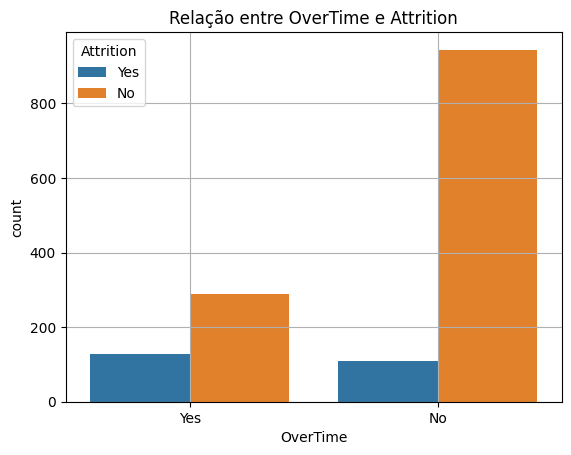

In [ ]:
# Verificando relação de OverTime e Attrition
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title('Relação entre OverTime e Attrition')
plt.grid(True)
plt.show()

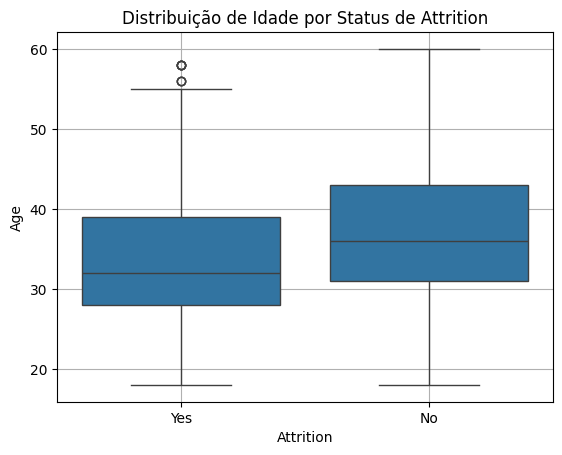

In [ ]:
# Verificando distribuição de idade vs Attrition
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Distribuição de Idade por Status de Attrition')
plt.grid(True)
plt.show()

## ✅ Principais Insights da Análise Exploratória

- A variável `Attrition` está desbalanceada: apenas ~16% dos funcionários saíram da empresa.
- A maioria dos dados não possui valores ausentes, e os outliers identificados (como altos salários) parecem coerentes com cargos seniores.
- A maior correlação positiva com `Attrition` foi observada em:
  - `DistanceFromHome`: funcionários que moram mais longe têm uma leve tendência a sair.
  - `NumCompaniesWorked`: pessoas com mais experiências anteriores tendem a ser menos estáveis.
- As maiores correlações negativas com `Attrition` foram:
  - `TotalWorkingYears`, `JobLevel` e `MonthlyIncome`: quanto mais experiente e bem remunerado o funcionário, menor o risco de saída.
  - `YearsInCurrentRole` e `Age`: pessoas mais maduras e com mais tempo no cargo tendem a ficar.
- A variável `OverTime` (categórica, analisada fora da matriz de correlação) mostrou um forte impacto visual: funcionários que fazem hora extra saem com mais frequência.
- A idade média de quem sai é visivelmente menor do que a de quem permanece.
- Departamentos como `Sales` e cargos como `Sales Representative` parecem ter maior rotatividade, segundo visualizações de contagem.
- O desempenho (`PerformanceRating`) não apresentou correlação significativa com rotatividade.
- As variáveis numéricas, isoladamente, não explicam totalmente o fenômeno — será importante explorar interações e variáveis derivadas.
